In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [2]:
## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


In [3]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
flight["day_of_week"] = pd.Categorical(flight["day_of_week"],
                                      categories=weekdays,
                                      ordered=True)

In [4]:
flight["delay_cat"] = flight.apply(
    lambda row : "None" if row.delay == 0 else ("Under 30'" if row.delay < 30 else (
        "Under 60'" if row.delay < 60 else "Over 60'")),
    axis = 1)

In [5]:
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours delay_cat  
0      1      None  
1      6      None  
2      3      None  
3      2      None  
4      2      None  


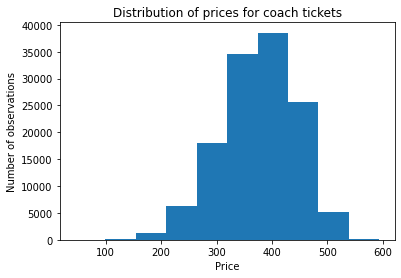

<Figure size 432x288 with 0 Axes>

In [6]:
## Task 1
plt.hist(flight["coach_price"])
plt.title("Distribution of prices for coach tickets")
plt.xlabel("Price")
plt.ylabel("Number of observations")
plt.show()
plt.clf()

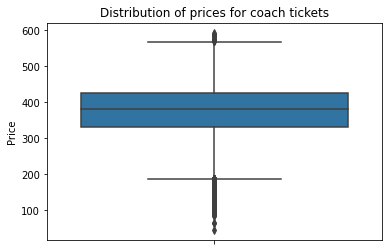

<Figure size 432x288 with 0 Axes>

In [7]:
sns.boxplot(data=flight,
            y="coach_price")
plt.title("Distribution of prices for coach tickets")
plt.ylabel("Price")
plt.show()
plt.clf()

Prices above \$ 500 can be considered high; prices below \$ 300 can be considered low. \$ 500 is not a good price for a coach ticket. \$ 380-\$ 400 can be considered average.

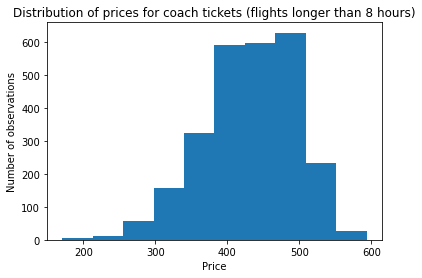

<Figure size 432x288 with 0 Axes>

In [8]:
## Task 2
plt.hist(flight[flight.hours >= 8]["coach_price"])
plt.title("Distribution of prices for coach tickets (flights longer than 8 hours)")
plt.xlabel("Price")
plt.ylabel("Number of observations")
plt.show()
plt.clf()

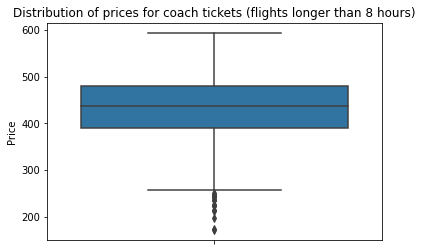

<Figure size 432x288 with 0 Axes>

In [9]:
sns.boxplot(data=flight[flight.hours >= 8],
            y="coach_price")
plt.title("Distribution of prices for coach tickets (flights longer than 8 hours)")
plt.ylabel("Price")
plt.show()
plt.clf()

Longer flights cost more, with the bulk of them costing between \$400 and \$480. A \$500 ticket seems more reasonable in this bracket.

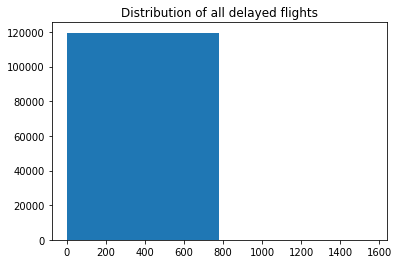

<Figure size 432x288 with 0 Axes>

In [10]:
## Task 3
plt.title("Distribution of all delayed flights")
plt.hist(flight[flight.delay > 0].delay,
        bins=2)
plt.show()
plt.clf()

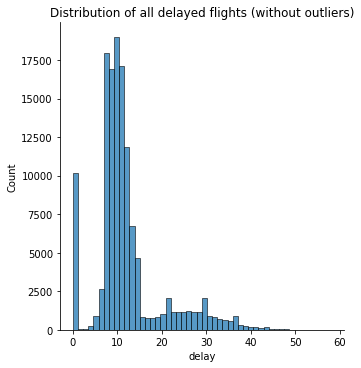

<Figure size 432x288 with 0 Axes>

In [11]:
sns.displot(flight[flight.delay <= 400].delay,
        bins=50,
        kde=False)
plt.title("Distribution of all delayed flights (without outliers)")
plt.show()
plt.clf()

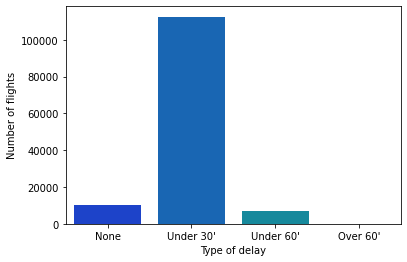

<Figure size 432x288 with 0 Axes>

In [12]:
sns.countplot(data=flight,
              x="delay_cat",
              palette='winter')
plt.xlabel("Type of delay")
plt.ylabel("Number of flights")
plt.show()
plt.clf()

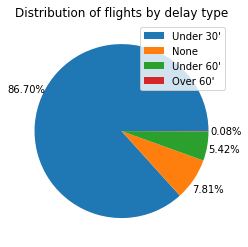

<Figure size 432x288 with 0 Axes>

In [13]:
plt.pie(flight.delay_cat.value_counts(), autopct='%.2f%%', pctdistance=1.2)
plt.legend(flight.groupby("delay_cat").miles.count().sort_values(ascending=False).index.tolist())
plt.title("Distribution of flights by delay type")
plt.show()
plt.clf()

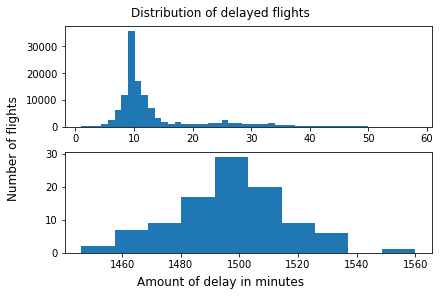

<Figure size 432x288 with 0 Axes>

In [14]:
fig = plt.figure(constrained_layout=True)
plt.subplot(2, 1, 1)
plt.hist(flight[(flight.delay > 0) & (flight.delay <= 60)].delay, bins=50)
plt.subplot(2, 1, 2)
plt.hist(flight[(flight.delay > 60) ].delay)
fig.supxlabel("Amount of delay in minutes")
fig.supylabel("Number of flights")
fig.suptitle("Distribution of delayed flights")
plt.show()
plt.clf()

Delays above 60 minutes are extremely rare. Most delays are under 20 minutes.

In [15]:
total_flights = len(flight)
flights_delayed_under_60 = len(flight[(flight.delay <= 60) & (flight.delay > 0)])
flights_delayed_over_60 = len(flight[(flight.delay > 60)])
percentage_delayed = ((flights_delayed_under_60 + flights_delayed_over_60) / total_flights) * 100
percentage_delayed_under_60 = (flights_delayed_under_60 / total_flights) * 100
percentage_delayed_over_60 = (flights_delayed_over_60 / total_flights) * 100

print(
  f"The number of delayed flights with delays above 60 minutes is {flights_delayed_over_60}"\
    f" ({round(percentage_delayed_over_60, 2)}% of all flights).",
  f"\nThe number of delayed flights with delays under 60 minutes is {flights_delayed_under_60}"\
    f" ({round(percentage_delayed_under_60, 2)}% of all flights).",
  f"\nThe total number of delayed flights is {flights_delayed_over_60 + flights_delayed_under_60}"\
    f" ({round(percentage_delayed, 2)}% of all flights).")

The number of delayed flights with delays above 60 minutes is 100 (0.08% of all flights). 
The number of delayed flights with delays under 60 minutes is 119541 (92.11% of all flights). 
The total number of delayed flights is 119641 (92.19% of all flights).


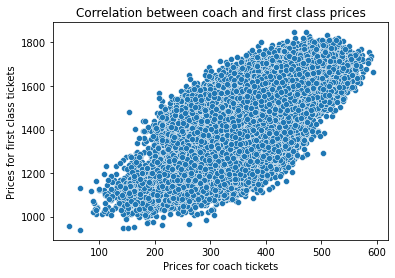

<Figure size 432x288 with 0 Axes>

In [16]:
## Task 4
sns.scatterplot(data=flight,
                x="coach_price",
                y="firstclass_price")
plt.title("Correlation between coach and first class prices")
plt.xlabel("Prices for coach tickets")
plt.ylabel("Prices for first class tickets")
plt.show()
plt.clf()

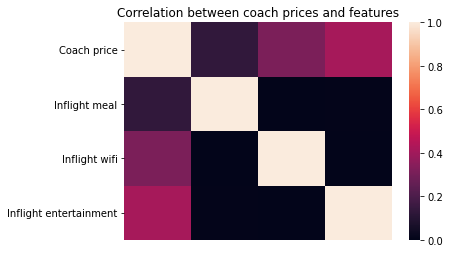

<Figure size 432x288 with 0 Axes>

In [17]:
## Task 5
coach_factors = ["coach_price", "inflight_meal", "inflight_wifi", "inflight_entertainment"]
heat_labels = [lab.replace("_", " ").capitalize() for lab in coach_factors]
sns.heatmap(data=flight[coach_factors].replace({'No': 0, 'Yes': 1}).corr(),
           xticklabels = False,
           yticklabels = heat_labels)
plt.title("Correlation between coach prices and features")
plt.show()
plt.clf()

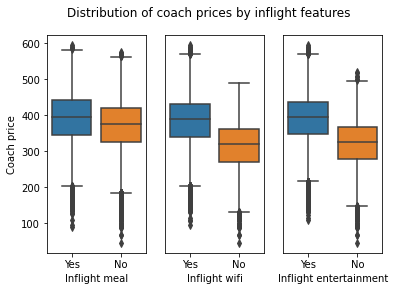

<Figure size 432x288 with 0 Axes>

In [18]:
# coach_boxplots = plt.figure()
ax1 = plt.subplot(1,3,1)
sns.boxplot(data=flight.sort_values(by="inflight_meal", ascending=False),
           y="coach_price",
           x="inflight_meal")
plt.xlabel("Inflight meal")
plt.ylabel("Coach price")
ax2 = plt.subplot(1,3,2)
sns.boxplot(data=flight,
           y="coach_price",
           x="inflight_wifi")
plt.xlabel("Inflight wifi")
plt.yticks([])
plt.ylabel("")
ax3 = plt.subplot(1,3,3)
sns.boxplot(data=flight,
           y="coach_price",
           x="inflight_entertainment")
plt.ylabel("")
plt.xlabel("Inflight entertainment")
plt.yticks([])
plt.suptitle("Distribution of coach prices by inflight features")
plt.show()
plt.clf()

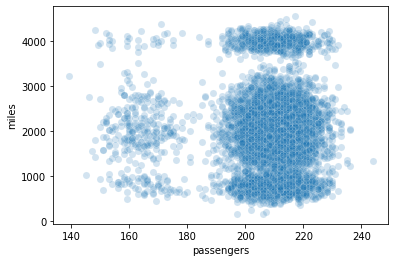

In [19]:
## Task 6
sns.scatterplot(data=flight.sample(frac=0.05),
               y="miles",
               x="passengers",
               s=50,
               alpha=0.2)
plt.show()

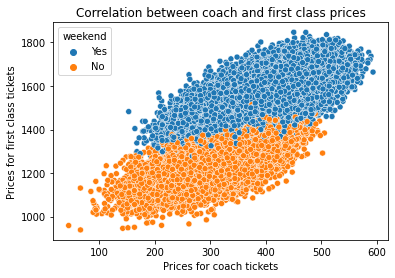

<Figure size 432x288 with 0 Axes>

In [20]:
## Task 7
sns.scatterplot(data=flight,
                x="coach_price",
                y="firstclass_price",
                hue="weekend")
plt.title("Correlation between coach and first class prices")
plt.xlabel("Prices for coach tickets")
plt.ylabel("Prices for first class tickets")
plt.show()
plt.clf()

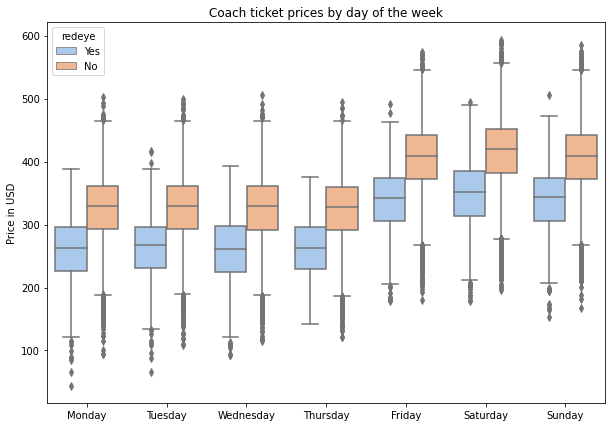

<Figure size 432x288 with 0 Axes>

In [21]:
## Task 8
plt.figure(figsize=(10,7))
sns.boxplot(data=flight.sort_values(by="day_of_week"),
           x="day_of_week",
           y="coach_price",
           hue="redeye",
           palette="pastel")
plt.title("Coach ticket prices by day of the week")
plt.xlabel("")
plt.ylabel("Price in USD")
plt.show()
plt.clf()